Optimized Random Forest Mean Squared Error (MSE): 23.35
Optimized Random Forest R² Score (Accuracy): 0.9942 (99.42%)
Predicted Calories Burned: 139.71 kcal
Similar Workout Profiles:
       Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories    BMI  \
7401    54   156.0    60.0      24.0       102.0       40.5     148.0  24.65   
5766    69   176.0    76.0      18.0       104.0       40.3     135.0  24.54   
4668    21   162.0    60.0      26.0        98.0       40.6     134.0  22.86   
7829    35   195.0    93.0      23.0       105.0       40.8     146.0  24.46   
13062   44   164.0    66.0      23.0       103.0       40.5     138.0  24.54   

       Gender_male  
7401         False  
5766          True  
4668         False  
7829          True  
13062        False  


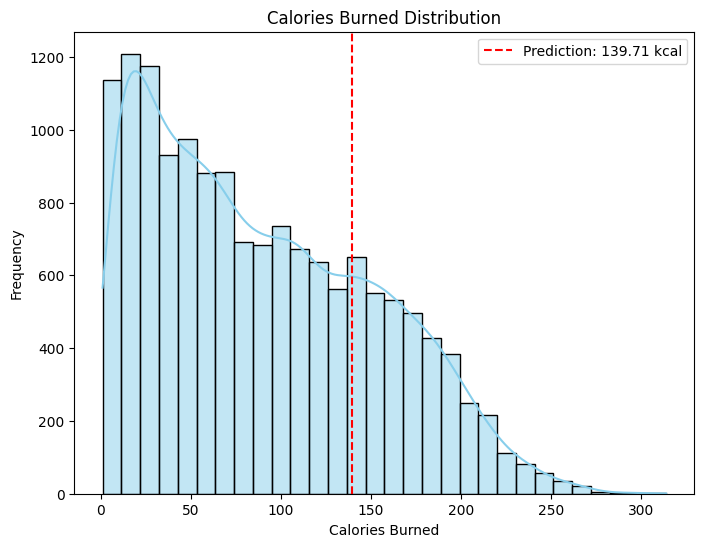

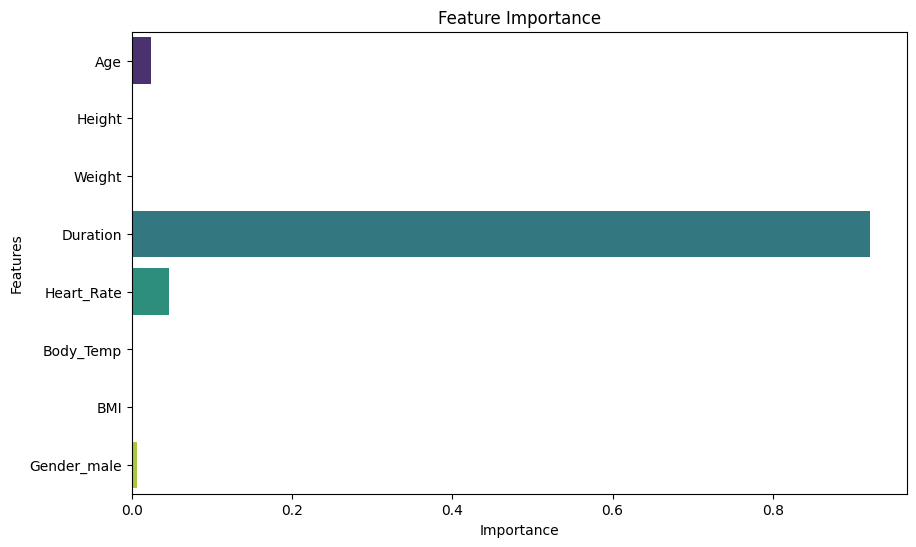

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

# Load Data
def load_data():
    calories = pd.read_csv("calories.csv")
    exercise = pd.read_csv("exercise.csv")
    return calories, exercise

calories, exercise = load_data()

# Merge and Preprocess Data
exercise_df = pd.merge(exercise, calories, on='User_ID')
exercise_df.drop(columns='User_ID', inplace=True)

exercise_df['BMI'] = round(exercise_df['Weight'] / ((exercise_df['Height'] / 100) ** 2), 2)
exercise_df = pd.get_dummies(exercise_df, columns=['Gender'], drop_first=True)

# Prepare Training Data
X = exercise_df.drop("Calories", axis=1)
y = exercise_df["Calories"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimized Random Forest Model Training
rf_model = RandomForestRegressor(
    n_estimators=100,        # Reduced for faster training
    max_depth=8,             # Balanced depth for speed and accuracy
    random_state=42
)
rf_model.fit(X_train, y_train)

# Evaluate Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Optimized Random Forest Mean Squared Error (MSE): {mse:.2f}")
    print(f"Optimized Random Forest R² Score (Accuracy): {r2:.4f} ({r2 * 100:.2f}%)")

evaluate_model(rf_model, X_test, y_test)

# Simulate User Input
user_data = {
    'Age': [30],
    'BMI': [22.5],
    'Duration': [45],
    'Heart_Rate': [90],
    'Body_Temp': [37.5],
    'Gender_male': [1]
}

user_input = pd.DataFrame(user_data)
user_input = user_input.reindex(columns=X_train.columns, fill_value=0)

# Make Prediction
predicted_calories = rf_model.predict(user_input)
print(f"Predicted Calories Burned: {predicted_calories[0]:.2f} kcal")

# Display Similar Profiles
calorie_range = (predicted_calories[0] - 10, predicted_calories[0] + 10)
similar_profiles = exercise_df[(exercise_df['Calories'] >= calorie_range[0]) & (exercise_df['Calories'] <= calorie_range[1])]

print("Similar Workout Profiles:")
if not similar_profiles.empty:
    print(similar_profiles.sample(min(5, len(similar_profiles))))
else:
    print("No similar profiles found.")

# Visualize Data
plt.figure(figsize=(8, 6))
sns.histplot(exercise_df['Calories'], bins=30, kde=True, color='skyblue')
plt.axvline(predicted_calories[0], color='red', linestyle='--', label=f"Prediction: {predicted_calories[0]:.2f} kcal")
plt.title("Calories Burned Distribution")
plt.xlabel("Calories Burned")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()